In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [181]:
def gray_old_2(rgb):
    g = np.round(((rgb>>11) & 0x1F) * 30 / 100)
    g += np.round(((rgb>>5) & 0x3F) * 59 / 100)
    g += np.round((rgb & 0x1F) * 11 / 100)
    return g

def gray_old(rgb):
    g = ((rgb>>11 & 0x1F) << 3 )* 21
    g += ((rgb>>5 & 0x3F) << 2) * 72
    g += ((rgb>>0 & 0x1F) << 3) * 7
    g = np.round(g/100)
    return g

def gray(rgb):
    # -> 8 bits, ratio, >>8
    g = ((rgb>>8) & 0xF8 )* 77 #red
    g += ((rgb>>3) & 0xFC )* 151 #green
    #g += (rgb<<3 & 0xF8 )* 28 #blue (first version)
    g += (rgb & 0x1F) * 224 #blue (second version)
    g = g >> 8
    return g

def gray_3(rgb):
    gray =  (rgb >> 2) & 0x3E00 # red
    gray += (rgb << 4) & 0x7E00 # green
    gray += (rgb << 8) & 0x1F00 # blue
    gray >>= 8
    return gray



# Max :
max = gray_3(0xFFFF) << 8
print(max)
print("ok" if max < 0xFFFF else 'erreur')



56064
ok


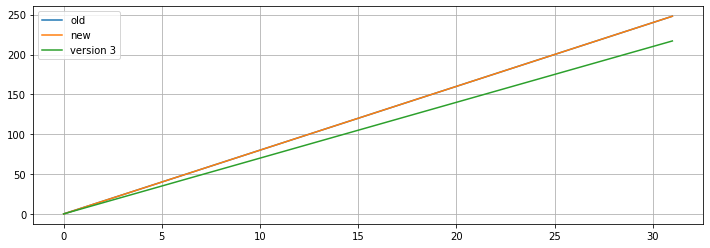

In [179]:
i = np.arange(32)
values = (i<<11) + (i<<6) + i
G = np.zeros([i.shape[0], 3])

for j, v in zip(i, values):
    G[j,0] = gray_old(v)
    G[j,1] = gray(v)
    G[j,2] = gray_3(v)

plt.figure(figsize=(12,4))
plt.grid()
plt.plot(i, G[:,0],label="old")
plt.plot(i, G[:,1],label="new")
plt.plot(i, G[:,2],label="version 3")
plt.legend()

In [138]:
number = 0xFFFF
print(f"{number:016b} : {gray_old(number)} | {gray(number)}")

1111111111111111 : 251.0 | 250.35999999999999


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


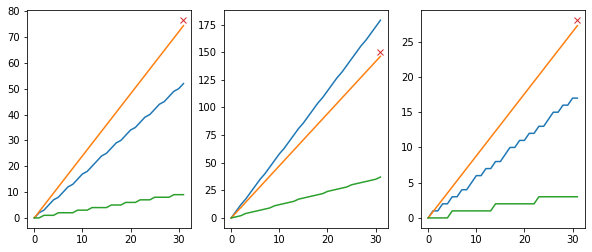

In [139]:
plt.figure(figsize=(10,4))
i = np.arange(32, dtype=int)
plt.subplot(131) # red
plt.plot(i, gray_old(i<<11))
plt.plot(i, gray(i<<11))
plt.plot(i, gray_old_2(i<<11))
plt.plot(i[-1], 255*0.3, 'x')

plt.subplot(132) # green
plt.plot(i, gray_old(i<<6)) # << 5 * 2 -> <<6
plt.plot(i, gray(i<<6))
plt.plot(i, gray_old_2(i<<6))
plt.plot(i[-1], 255*0.59, 'x')

plt.subplot(133) # blue
plt.plot(i, gray_old(i))
plt.plot(i, gray(i))
plt.plot(i, gray_old_2(i))
plt.plot(i[-1], 255*0.11, 'x')

print(i)


76.5